1/1 [==============================] - 1s 984ms/step
Original label: otter
1/1 [==============================] - 0s 111ms/step
Adversarial label: sea_lion


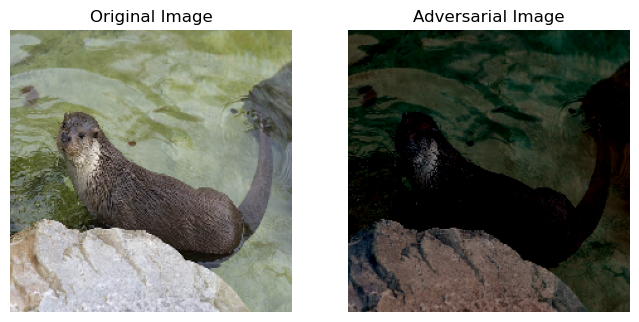

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

# Wczytanie gotowego modelu ResNet50
model = ResNet50(weights='imagenet')

# Przygotowanie testowego obrazu do klasyfikacji, w tym przypadku
image_path = 'C:/Users/janad/Documents/Studia/Sztuczna inteligencja/Projekt/wydra.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
input_image = tf.keras.preprocessing.image.img_to_array(image)
input_image = np.expand_dims(input_image, axis=0)
input_image = preprocess_input(input_image)

# Klasyfikacja obrazu przy użyciu pierwotnego modelu
original_predictions = model.predict(input_image)
original_label = decode_predictions(original_predictions, top=1)[0][0][1]
print('Original label:', original_label)

# Generowanie wrażliwego przykładu
perturbation = np.random.uniform(-0.1, 0.1, input_image.shape)  # Generowanie zakłócenia
adversarial_image = input_image + perturbation
adversarial_image = np.clip(adversarial_image, 0, 255)  # Ograniczenie wartości pikseli do zakresu 0-255

# Klasyfikacja wrażliwego przykładu
adversarial_predictions = model.predict(adversarial_image)
adversarial_label = decode_predictions(adversarial_predictions, top=1)[0][0][1]
print('Adversarial label:', adversarial_label)

# Wyświetlenie oryginalnego i wrażliwego obrazu
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Adversarial Image')
plt.imshow(adversarial_image[0].astype(np.uint8))
plt.axis('off')

plt.show()
